In [1]:
import pandas as pd
import numpy as np

In [2]:
# CCTV_Seoul = pd.read_csv("data/CCTV_Seoul.csv", encoding="utf-8")
CCTV_Seoul = pd.read_csv("data/CCTV_Seoul_2.csv", encoding="utf-8")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
1,강 동 구,"1,879",303,387.0,134.0,59,144.0,194.0,273.0,385.0
2,강 북 구,"1,265",243,88.0,141.0,74,145.0,254.0,1.0,319.0
3,강 서 구,"1,617",219,155.0,118.0,230,187.0,190.0,264.0,254.0
4,관 악 구,"3,985",430,56.0,419.0,487,609.0,619.0,694.0,671.0


In [3]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : "자치구"}, inplace=True)
CCTV_Seoul.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
1,강 동 구,"1,879",303,387.0,134.0,59,144.0,194.0,273.0,385.0
2,강 북 구,"1,265",243,88.0,141.0,74,145.0,254.0,1.0,319.0
3,강 서 구,"1,617",219,155.0,118.0,230,187.0,190.0,264.0,254.0
4,관 악 구,"3,985",430,56.0,419.0,487,609.0,619.0,694.0,671.0


In [4]:
pop_Seoul = pd.read_excel('data/population_Seoul.xlsx', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035


In [5]:
#가장 위 컬럼명 바꾸기
pop_Seoul.rename(columns={pop_Seoul.columns[6]: '한국인',
                         pop_Seoul.columns[9]: '외국인',
                         pop_Seoul.columns[13]: '고령자'}, inplace=True)
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035


In [6]:
CCTV_Seoul.head(26)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
1,강 동 구,"1,879",303,387.0,134.0,59,144.0,194.0,273.0,385.0
2,강 북 구,"1,265",243,88.0,141.0,74,145.0,254.0,1.0,319.0
3,강 서 구,"1,617",219,155.0,118.0,230,187.0,190.0,264.0,254.0
4,관 악 구,"3,985",430,56.0,419.0,487,609.0,619.0,694.0,671.0
5,광 진 구,"1,581",470,42.0,83.0,87,64.0,21.0,468.0,346.0
6,구 로 구,"3,227",852,219.0,349.0,187,268.0,326.0,540.0,486.0
7,금 천 구,"1,634",27,17.0,242.0,101,382.0,136.0,199.0,530.0
8,노 원 구,"1,906",481,117.0,203.0,80,461.0,298.0,110.0,156.0
9,도 봉 구,858,197,66.0,8.0,185,59.0,155.0,117.0,71.0


자치구별 CCTV 하위 5개 정렬

In [7]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
24,중 랑 구,"1,068",NaN,NaN,NaN,770,102.0,121.0,66.0,9.0
2,강 북 구,"1,265",243,88.0,141.0,74,145.0,254.0,1.0,319.0
22,종 로 구,"1,471",8,7.0,599.0,132,195.0,148.0,281.0,101.0
23,중 구,"1,544",25,165.0,114.0,80,245.0,270.0,317.0,328.0
5,광 진 구,"1,581",470,42.0,83.0,87,64.0,21.0,468.0,346.0


자치구별 CCTV 상위 5개 정렬

In [8]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197,66.0,8.0,185,59.0,155.0,117.0,71.0
0,강 남 구,"5,221","1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
4,관 악 구,"3,985",430,56.0,419.0,487,609.0,619.0,694.0,671.0
6,구 로 구,"3,227",852,219.0,349.0,187,268.0,326.0,540.0,486.0
16,성 북 구,"3,003",779,84.0,304.0,241,279.0,388.0,285.0,643.0


In [9]:
#소계 데이터 문자형 >> 정수형으로 변환
cctv_list = []
for i in range(len(CCTV_Seoul['소계'].tolist())-3):
    CCTV_Seoul['소계'][i] = CCTV_Seoul['소계'][i].replace(',', '')
    a = int(CCTV_Seoul['소계'][i].replace(' ', ''))
    cctv_list.append(a)
    
CCTV_Seoul['소계'] = pd.DataFrame(cctv_list)

<ipython-input-9-c2e2b0872f38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCTV_Seoul['소계'][i] = CCTV_Seoul['소계'][i].replace(',', '')


In [10]:
#CCTV 소계 기준 하위 5개 정렬
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858.0,197,66.0,8.0,185,59.0,155.0,117.0,71.0
24,중 랑 구,1068.0,NaN,NaN,NaN,770,102.0,121.0,66.0,9.0
2,강 북 구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0
22,종 로 구,1471.0,8,7.0,599.0,132,195.0,148.0,281.0,101.0
23,중 구,1544.0,25,165.0,114.0,80,245.0,270.0,317.0,328.0


In [11]:
#CCTV 소계 기준 상위 5개 정렬
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
4,관 악 구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0
6,구 로 구,3227.0,852,219.0,349.0,187,268.0,326.0,540.0,486.0
16,성 북 구,3003.0,779,84.0,304.0,241,279.0,388.0,285.0,643.0
21,은 평 구,2962.0,"1,365",83.0,99.0,343,180.0,296.0,229.0,367.0


In [12]:
#최근 3년 CCTV 증가율
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2018년'])/CCTV_Seoul['2015년'] * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
5,광 진 구,1581.0,470,42.0,83.0,87,64.0,21.0,468.0,346.0,1304.687500
13,서대문구,2121.0,565,233.0,214.0,114,109.0,277.0,415.0,194.0,812.844037
18,양 천 구,2775.0,772,161.0,185.0,169,172.0,349.0,137.0,830.0,765.116279
11,동 작 구,1780.0,238,93.0,29.0,503,130.0,254.0,278.0,255.0,605.384615
1,강 동 구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,591.666667
9,도 봉 구,858.0,197,66.0,8.0,185,59.0,155.0,117.0,71.0,581.355932
15,성 동 구,2679.0,665,109.0,118.0,101,258.0,201.0,933.0,294.0,553.488372
12,마 포 구,1935.0,585,108.0,69.0,70,177.0,359.0,372.0,195.0,523.163842
10,동대문구,2003.0,NaN,NaN,NaN,"1,326",111.0,233.0,136.0,197.0,509.909910
6,구 로 구,3227.0,852,219.0,349.0,187,268.0,326.0,540.0,486.0,504.477612


In [13]:
#서울시 인구 현황
pop_Seoul.head(28)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650
6,2020.2/4,성동구,135937,304851,148554,156297,297397,145258,152139,7454,3296,4158,2.19,45005
7,2020.2/4,광진구,166307,363925,175083,188842,349574,168879,180695,14351,6204,8147,2.1,49457
8,2020.2/4,동대문구,166451,360380,177237,183143,345593,171392,174201,14787,5845,8942,2.08,60817
9,2020.2/4,중랑구,183310,399415,197384,202031,394414,195349,199065,5001,2035,2966,2.15,67637


In [14]:
#필요없는 자료 전처리
pop_Seoul.drop([0], inplace=True)
pop_Seoul.drop([1], inplace=True)
pop_Seoul.drop([2], inplace=True)

In [15]:
pop_Seoul.head(10)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650
6,2020.2/4,성동구,135937,304851,148554,156297,297397,145258,152139,7454,3296,4158,2.19,45005
7,2020.2/4,광진구,166307,363925,175083,188842,349574,168879,180695,14351,6204,8147,2.1,49457
8,2020.2/4,동대문구,166451,360380,177237,183143,345593,171392,174201,14787,5845,8942,2.08,60817
9,2020.2/4,중랑구,183310,399415,197384,202031,394414,195349,199065,5001,2035,2966,2.15,67637
10,2020.2/4,성북구,195064,452290,217551,234739,441812,213431,228381,10478,4120,6358,2.26,72822
11,2020.2/4,강북구,145559,315395,153389,162006,311773,152028,159745,3622,1361,2261,2.14,62338
12,2020.2/4,도봉구,138966,331744,161724,170020,329560,160855,168705,2184,869,1315,2.37,60784


In [16]:
#외국인비율 고령자비율 계산
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구'] * 100
pop_Seoul.head(25)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203,6.3151,17.5698
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035,7.30574,17.6689
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650,6.49286,16.1598
6,2020.2/4,성동구,135937,304851,148554,156297,297397,145258,152139,7454,3296,4158,2.19,45005,2.44513,14.7629
7,2020.2/4,광진구,166307,363925,175083,188842,349574,168879,180695,14351,6204,8147,2.1,49457,3.94339,13.5899
8,2020.2/4,동대문구,166451,360380,177237,183143,345593,171392,174201,14787,5845,8942,2.08,60817,4.10317,16.8758
9,2020.2/4,중랑구,183310,399415,197384,202031,394414,195349,199065,5001,2035,2966,2.15,67637,1.25208,16.934
10,2020.2/4,성북구,195064,452290,217551,234739,441812,213431,228381,10478,4120,6358,2.26,72822,2.31666,16.1007
11,2020.2/4,강북구,145559,315395,153389,162006,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
12,2020.2/4,도봉구,138966,331744,161724,170020,329560,160855,168705,2184,869,1315,2.37,60784,0.658339,18.3226


In [17]:
pop_Seoul.sort_values(by='인구', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
26,2020.2/4,송파구,280135,678067,327383,350684,671512,324317,347195,6555,3066,3489,2.4,90700,0.966719,13.3763
18,2020.2/4,강서구,265252,593203,286668,306535,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
25,2020.2/4,강남구,233484,546158,261187,284971,541233,258753,282480,4925,2434,2491,2.32,73097,0.901754,13.3839
13,2020.2/4,노원구,217897,533041,257473,275568,528887,255624,273263,4154,1849,2305,2.43,83636,0.779302,15.6904
23,2020.2/4,관악구,273715,516318,258740,257578,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793


In [18]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
21,2020.2/4,영등포구,179787,405154,202648,202506,373349,184905,188444,31805,17743,14062,2.08,60071,7.8501,14.8267
19,2020.2/4,구로구,178367,436707,218051,218656,405075,200098,204977,31632,17953,13679,2.27,68280,7.2433,15.6352
20,2020.2/4,금천구,112570,250554,128078,122476,232250,117762,114488,18304,10316,7988,2.06,38950,7.30541,15.5456
23,2020.2/4,관악구,273715,516318,258740,257578,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650,6.49286,16.1598


In [19]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
21,2020.2/4,영등포구,179787,405154,202648,202506,373349,184905,188444,31805,17743,14062,2.08,60071,7.8501,14.8267
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035,7.30574,17.6689
20,2020.2/4,금천구,112570,250554,128078,122476,232250,117762,114488,18304,10316,7988,2.06,38950,7.30541,15.5456
19,2020.2/4,구로구,178367,436707,218051,218656,405075,200098,204977,31632,17953,13679,2.27,68280,7.2433,15.6352
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650,6.49286,16.1598


In [20]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
26,2020.2/4,송파구,280135,678067,327383,350684,671512,324317,347195,6555,3066,3489,2.4,90700,0.966719,13.3763
18,2020.2/4,강서구,265252,593203,286668,306535,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
13,2020.2/4,노원구,217897,533041,257473,275568,528887,255624,273263,4154,1849,2305,2.43,83636,0.779302,15.6904
14,2020.2/4,은평구,210664,483938,232423,251515,479524,230640,248884,4414,1783,2631,2.28,83272,0.9121,17.2072
23,2020.2/4,관악구,273715,516318,258740,257578,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793


In [21]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
11,2020.2/4,강북구,145559,315395,153389,162006,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
12,2020.2/4,도봉구,138966,331744,161724,170020,329560,160855,168705,2184,869,1315,2.37,60784,0.658339,18.3226
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035,7.30574,17.6689
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203,6.3151,17.5698
14,2020.2/4,은평구,210664,483938,232423,251515,479524,230640,248884,4414,1783,2631,2.28,83272,0.9121,17.2072


In [22]:
cctv_name = []
for i in range(len(CCTV_Seoul['자치구'].tolist())-3):
    a = CCTV_Seoul['자치구'][i].replace(' ', '')
    cctv_name.append(a)
    
CCTV_Seoul['자치구'] = pd.DataFrame(cctv_name)

In [23]:
CCTV_Seoul

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0,327.838828
1,강동구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,591.666667
2,강북구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0,395.862069
3,강서구,1617.0,219,155.0,118.0,230,187.0,190.0,264.0,254.0,378.609626
4,관악구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0,325.779967
5,광진구,1581.0,470,42.0,83.0,87,64.0,21.0,468.0,346.0,1304.687500
6,구로구,3227.0,852,219.0,349.0,187,268.0,326.0,540.0,486.0,504.477612
7,금천구,1634.0,27,17.0,242.0,101,382.0,136.0,199.0,530.0,226.439791
8,노원구,1906.0,481,117.0,203.0,80,461.0,298.0,110.0,156.0,122.342733
9,도봉구,858.0,197,66.0,8.0,185,59.0,155.0,117.0,71.0,581.355932


In [24]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구')
data_result.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,...,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
0,강남구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0,...,541233,258753,282480,4925,2434,2491,2.32,73097,0.901754,13.3839
1,강동구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,...,457164,225206,231958,4383,2036,2347,2.37,67742,0.949632,14.6772
2,강북구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0,...,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
3,강서구,1617.0,219,155.0,118.0,230,187.0,190.0,264.0,254.0,...,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
4,관악구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0,...,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793


In [25]:
data_result.set_index('자치구', inplace=True)
data_result.head()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,...,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0,327.838828,...,541233,258753,282480,4925,2434,2491,2.32,73097,0.901754,13.3839
강동구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,591.666667,...,457164,225206,231958,4383,2036,2347,2.37,67742,0.949632,14.6772
강북구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0,395.862069,...,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
강서구,1617.0,219,155.0,118.0,230,187.0,190.0,264.0,254.0,378.609626,...,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
관악구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0,325.779967,...,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793


In [26]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구')
data_result

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,...,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
0,강남구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0,...,541233,258753,282480,4925,2434,2491,2.32,73097,0.901754,13.3839
1,강동구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,...,457164,225206,231958,4383,2036,2347,2.37,67742,0.949632,14.6772
2,강북구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0,...,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
3,강서구,1617.0,219,155.0,118.0,230,187.0,190.0,264.0,254.0,...,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
4,관악구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0,...,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793
5,광진구,1581.0,470,42.0,83.0,87,64.0,21.0,468.0,346.0,...,349574,168879,180695,14351,6204,8147,2.1,49457,3.94339,13.5899
6,구로구,3227.0,852,219.0,349.0,187,268.0,326.0,540.0,486.0,...,405075,200098,204977,31632,17953,13679,2.27,68280,7.2433,15.6352
7,금천구,1634.0,27,17.0,242.0,101,382.0,136.0,199.0,530.0,...,232250,117762,114488,18304,10316,7988,2.06,38950,7.30541,15.5456
8,노원구,1906.0,481,117.0,203.0,80,461.0,298.0,110.0,156.0,...,528887,255624,273263,4154,1849,2305,2.43,83636,0.779302,15.6904
9,도봉구,858.0,197,66.0,8.0,185,59.0,155.0,117.0,71.0,...,329560,160855,168705,2184,869,1315,2.37,60784,0.658339,18.3226


In [27]:
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['기간']
del data_result['인구.1']
del data_result['인구.2']
del data_result['인구.4']
del data_result['인구.5']
del data_result['인구.7']
del data_result['인구.8']
del data_result['세대당인구']
data_result.head()

,자치구,소계,2011년 이전,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,"1,944",327.838828,233484,546158,541233,4925,73097,0.901754,13.3839
1,강동구,1879.0,303,591.666667,193095,461547,457164,4383,67742,0.949632,14.6772
2,강북구,1265.0,243,395.862069,145559,315395,311773,3622,62338,1.1484,19.7651
3,강서구,1617.0,219,378.609626,265252,593203,586936,6267,87032,1.05647,14.6715
4,관악구,3985.0,430,325.779967,273715,516318,499740,16578,77341,3.21081,14.9793


In [28]:
del data_result['2011년 이전']
data_result

,자치구,소계,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,327.838828,233484,546158,541233,4925,73097,0.901754,13.3839
1,강동구,1879.0,591.666667,193095,461547,457164,4383,67742,0.949632,14.6772
2,강북구,1265.0,395.862069,145559,315395,311773,3622,62338,1.1484,19.7651
3,강서구,1617.0,378.609626,265252,593203,586936,6267,87032,1.05647,14.6715
4,관악구,3985.0,325.779967,273715,516318,499740,16578,77341,3.21081,14.9793
5,광진구,1581.0,1304.687500,166307,363925,349574,14351,49457,3.94339,13.5899
6,구로구,3227.0,504.477612,178367,436707,405075,31632,68280,7.2433,15.6352
7,금천구,1634.0,226.439791,112570,250554,232250,18304,38950,7.30541,15.5456
8,노원구,1906.0,122.342733,217897,533041,528887,4154,83636,0.779302,15.6904
9,도봉구,858.0,581.355932,138966,331744,329560,2184,60784,0.658339,18.3226


In [29]:
data_result.set_index('자치구', inplace=True)
data_result.head()

,소계,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,
강남구,5221.0,327.838828,233484,546158,541233,4925,73097,0.901754,13.3839
강동구,1879.0,591.666667,193095,461547,457164,4383,67742,0.949632,14.6772
강북구,1265.0,395.862069,145559,315395,311773,3622,62338,1.1484,19.7651
강서구,1617.0,378.609626,265252,593203,586936,6267,87032,1.05647,14.6715
관악구,3985.0,325.779967,273715,516318,499740,16578,77341,3.21081,14.9793


In [30]:
aged_ratio = np.array(data_result['고령자비율'], dtype= int)
cctv_total = np.array(data_result['소계'], dtype=int)
np.corrcoef(aged_ratio, cctv_total)

array([[ 1.        , -0.42307936],
       [-0.42307936,  1.        ]])

In [31]:
foreigner_ratio = np.array(data_result['외국인비율'], dtype=int)
np.corrcoef(foreigner_ratio, cctv_total)

array([[ 1.        , -0.07758749],
       [-0.07758749,  1.        ]])

In [32]:
pop = np.array(data_result['인구'], dtype=int)
np.corrcoef(pop,cctv_total)

array([[1.        , 0.38014758],
       [0.38014758, 1.        ]])

In [33]:
data_result.sort_values(by='소계', ascending=False).head(5)


,소계,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,
강남구,5221.0,327.838828,233484,546158,541233,4925,73097,0.901754,13.3839
관악구,3985.0,325.779967,273715,516318,499740,16578,77341,3.21081,14.9793
구로구,3227.0,504.477612,178367,436707,405075,31632,68280,7.2433,15.6352
성북구,3003.0,471.684588,195064,452290,441812,10478,72822,2.31666,16.1007
은평구,2962.0,495.555556,210664,483938,479524,4414,83272,0.9121,17.2072


In [34]:
data_result.head(5)

,소계,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,
강남구,5221.0,327.838828,233484,546158,541233,4925,73097,0.901754,13.3839
강동구,1879.0,591.666667,193095,461547,457164,4383,67742,0.949632,14.6772
강북구,1265.0,395.862069,145559,315395,311773,3622,62338,1.1484,19.7651
강서구,1617.0,378.609626,265252,593203,586936,6267,87032,1.05647,14.6715
관악구,3985.0,325.779967,273715,516318,499740,16578,77341,3.21081,14.9793


In [35]:
#시각화
import matplotlib.pyplot as plt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == "Darwin":
    rc("font", family='AppleGothic')
elif platform.system() == "Windows":
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("알수없는시스템입니다.")
    
data_result.head()

,소계,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,
강남구,5221.0,327.838828,233484,546158,541233,4925,73097,0.901754,13.3839
강동구,1879.0,591.666667,193095,461547,457164,4383,67742,0.949632,14.6772
강북구,1265.0,395.862069,145559,315395,311773,3622,62338,1.1484,19.7651
강서구,1617.0,378.609626,265252,593203,586936,6267,87032,1.05647,14.6715
관악구,3985.0,325.779967,273715,516318,499740,16578,77341,3.21081,14.9793


시각화

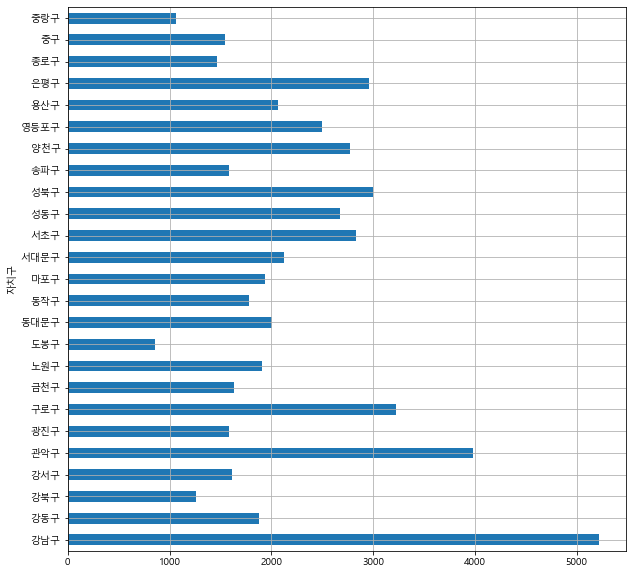

In [36]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

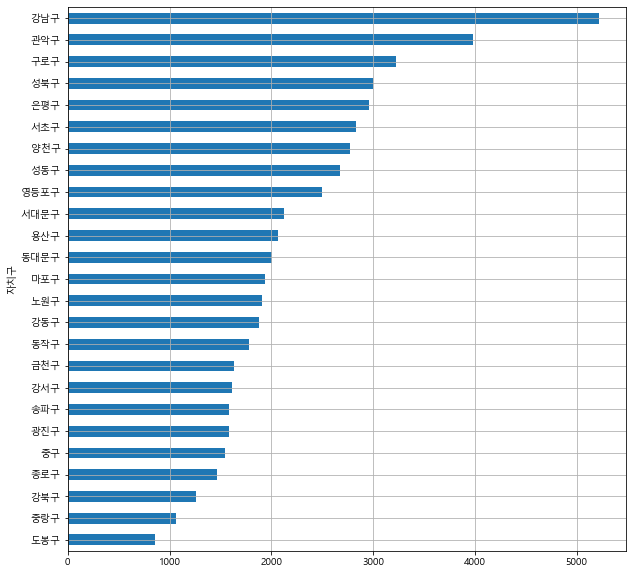

In [37]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

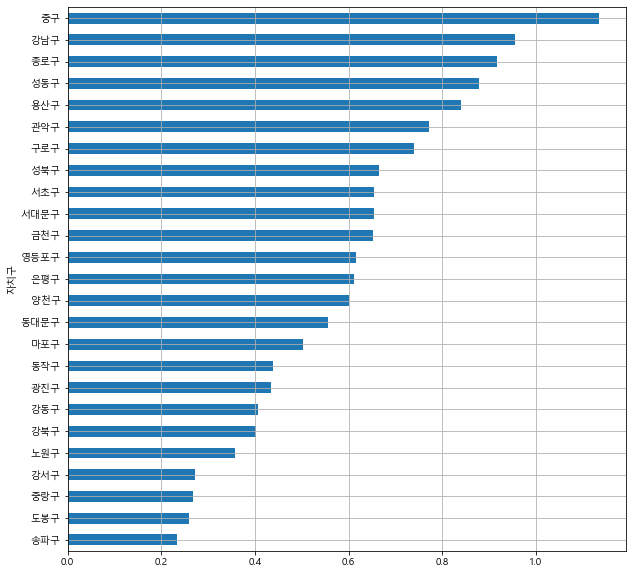

In [38]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구'] *100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

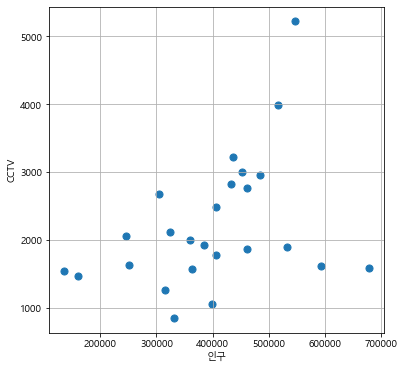

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구'], data_result['소계'], s=50)
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [42]:
fp1 = np.polyfit(pop, cctv_total, 1)
fp1

array([2.88508881e-03, 1.06734028e+03])

In [43]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

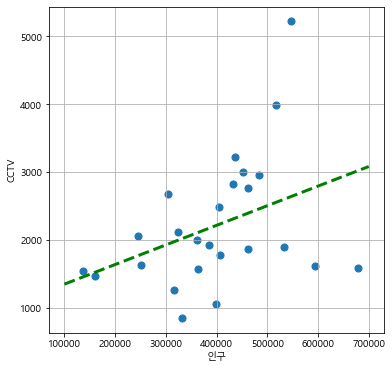

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [45]:
pop_num = np.array(data_result['인구'], dtype=int)
cctv_tatal = np.array(data_result['소계'], dtype=int)
fp1 = np.polyfit(pop_num, cctv_tatal, 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,,
강남구,5221.0,327.838828,233484,546158,541233,4925,73097,0.901754,13.3839,0.95595,2577.95
송파구,1586.0,368.674699,280135,678067,671512,6555,90700,0.966719,13.3763,0.2339,1437.62
관악구,3985.0,325.779967,273715,516318,499740,16578,77341,3.21081,14.9793,0.771811,1428.04
도봉구,858.0,581.355932,138966,331744,329560,2184,60784,0.658339,18.3226,0.258633,1166.45
강서구,1617.0,378.609626,265252,593203,586936,6267,87032,1.05647,14.6715,0.272588,1161.78


In [46]:
data = pd.DataFrame(df_sort)
data.to_csv('data/CCTV_result.csv', encoding='utf-8')

In [47]:
CCTV_result = pd.read_csv('data/CCTV_result.csv', encoding='utf-8')
CCTV_result.head(30)

,자치구,소계,최근증가율,세대,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,5221.0,327.838828,233484,546158,541233,4925,73097,0.901754,13.383856,0.955950,2577.945379
1,송파구,1586.0,368.674699,280135,678067,671512,6555,90700,0.966719,13.376259,0.233900,1437.623801
2,관악구,3985.0,325.779967,273715,516318,499740,16578,77341,3.210812,14.979334,0.771811,1428.036429
3,도봉구,858.0,581.355932,138966,331744,329560,2184,60784,0.658339,18.322562,0.258633,1166.451188
4,강서구,1617.0,378.609626,265252,593203,586936,6267,87032,1.056468,14.671537,0.272588,1161.783624
5,중랑구,1068.0,192.156863,183310,399415,394414,5001,67637,1.252081,16.934016,0.267391,1151.688033
6,구로구,3227.0,504.477612,178367,436707,405075,31632,68280,7.243300,15.635197,0.738939,899.721235
7,성동구,2679.0,553.488372,135937,304851,297397,7454,45005,2.445129,14.762950,0.878790,732.137505
8,강북구,1265.0,395.862069,145559,315395,311773,3622,62338,1.148401,19.765057,0.401084,712.282871
9,노원구,1906.0,122.342733,217897,533041,528887,4154,83636,0.779302,15.690350,0.357571,699.210911


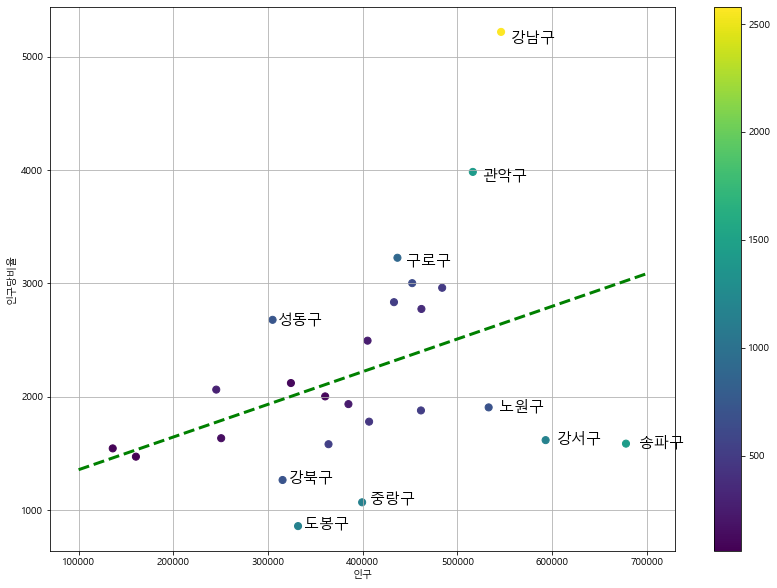

In [48]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구'], data_result['소계'],
            c=data_result['오차'] , s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

#자치구 이름 표시 개수
for n in range(10):
    plt.text(df_sort['인구'][n]*1.02, df_sort['소계'][n]*0.98, 
            df_sort.index[n], fontsize=15)

plt.xlabel('인구')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()